In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train_preprocessed.csv')
df_test = pd.read_csv('data/test_preprocessed.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df_train.drop('Interest.Rate', axis=1)
y = df_train['Interest.Rate']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
X_train.shape

(1760, 15)

In [7]:
X_test.shape

(440, 15)

In [8]:
y_train.shape

(1760,)

In [9]:
y_test.shape

(440,)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [11]:
kfoldvalidation = KFold(5, random_state=100, shuffle=True)
model = LinearRegression()

In [12]:
results = cross_val_score(model, X_train, y_train, cv=kfoldvalidation)
results.mean()

0.7470320435143906

In [13]:
results

array([0.70846981, 0.75726505, 0.71953231, 0.79452073, 0.75537232])

In [14]:
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression()

In [15]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

In [16]:
interest_rate = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': test_pred})

In [17]:
interest_rate

,Actual Values,Predicted Values
1743,21.48,16.254936
1777,12.12,11.335805
972,19.69,18.635732
1958,9.91,11.741183
2058,15.31,15.098299
...,...,...
1359,6.03,5.781677
287,8.94,10.526601
19,7.88,11.721949
1656,13.99,14.437342


<AxesSubplot:>

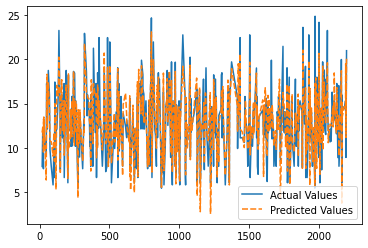

In [18]:
sns.lineplot(data=interest_rate)

In [19]:
from sklearn.metrics import r2_score 

r_square_train_LR = r2_score(y_train,train_pred)
r_square_validation_LR = r2_score(y_test, test_pred)

In [20]:
r_square_train_LR

0.754374168988404

In [21]:
r_square_validation_LR

0.7730518749284141

### Model Accuracy
Linear Model is 75 percent confident that predicted output is 77 percent accurate

## XGBoost

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
xg_model = XGBRegressor()

In [24]:
results = cross_val_score(xg_model, X_train, y_train, cv=kfoldvalidation)
results.mean()

0.7909411182152631

In [25]:
results

array([0.76874408, 0.79552209, 0.76985887, 0.82786518, 0.79271536])

In [26]:
params = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [1, 2, 4],
    'verbosity': [2],
}

In [27]:
gridcv = GridSearchCV(xg_model, param_grid=params, cv=kfoldvalidation, n_jobs=-1, verbose=4)

In [28]:
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426510059\work\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13:48:24] INFO: D:\bld\xgboost-split_1637426

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weigh...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4],
                         'n_estimators': array([100, 200, 300, 400]),
                         'verbosity': [2]},
             verbose=4)

In [29]:
gridcv.best_params_

{'max_depth': 2, 'n_estimators': 100, 'verbosity': 2}

In [30]:
gridcv.score(X_train, y_train)

0.8784780937890966

In [31]:
gridcv.score(X_test, y_test)

0.8398115165361318

In [32]:
test_pred = gridcv.predict(X_test)

In [33]:
interest_rate = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': test_pred})

In [34]:
interest_rate

,Actual Values,Predicted Values
1743,21.48,15.857418
1777,12.12,10.808365
972,19.69,19.164562
1958,9.91,10.069077
2058,15.31,15.492066
...,...,...
1359,6.03,7.265687
287,8.94,10.085903
19,7.88,11.213958
1656,13.99,14.398500


<AxesSubplot:>

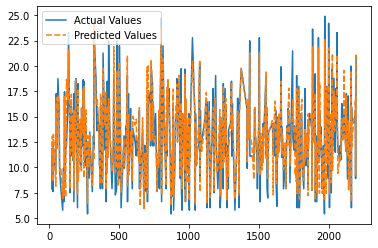

In [35]:
sns.lineplot(data=interest_rate)

### Model Accuracy
XGBModel is 88 percent confident that predicted output is 84 percent accurate